# INFSCI0310 Computation in Information Science
# Department of Computer Science, SCUPI

# Assignment 1: Introduction to Python 

Welcome to assignment 1, where we prepared a few Python examples and exercises to get you started <br>
We will skip Python basics and discover more high-level features, and exclude Numpy section because it is everywhere in this assignment. <br>
If you are looking for a tutorial to study Python basics: https://www.w3schools.com/python/ <br>
Or if you prefer an online book to study Python: http://www.greenteapress.com/thinkpython/html/index.html <br>


# Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├── [your working directory]
   ├── lena.jpg
   └── olympic_data
       ├── female100.csv
       ├── female200.csv
       ├── female400.csv
       ├── male100.csv
       ├── male200.csv
       └── male400.csv
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

# 1. Floating Point Number

In Python, not all floating point numbers can be represented exactly in the computer.
Following examples show that the number 1.0 can be represented exactly but the numbers 0.1 cannot:

In [39]:
'%.20f' % 1.0

'1.00000000000000000000'

In [40]:
'%.20f' % 0.1

'0.10000000000000000555'

This situation can cause problems. Suppose we need a loop where x takes values 0.1, 0.2, 0.3, …, 0.9, 1.0. <br>
We might write the following statement:

```python
x = 0.0
while not x == 1.0:
    x = x + 0.1
    print ( "x=%19.17f" % ( x ))
```

How will this loop behave? You can try yourself.

Hence, you may realise that you should aviod comparing two float numbers for equality.

Now we consider a simple task: consecutive addition by looping.
Example code below defines $x = 0$, $dx = 0.1$, computes the consecutive addition $n=10$ times

In [41]:
x = 0
dx = 0.1
n = 10
for i in range(n):
    x = x + dx
print ("x=%19.17f" % ( x ))

x=0.99999999999999989


From the result, we can see that it deviates from the actual value 1.0 <br>
Such deviation can be computed as the absolute value of the difference between the result and the actual value, i.e., $| x_{final} - x_{actual} |$.

In Python, the sympy package provides arbitrary precision. <br>
Using *sympy.Rational*, we can define the fraction 1/10 symbolically. <br>
Adding this 10 times will lead exactly to the value 1.0, as demonstrated by the following script:

In [42]:
from sympy import Rational
x = 0
dx = Rational(1 ,10)
n = 10
for i in range(n):
    x = x + dx
print ( "x=%19.17f" % ( x ))

x=1.00000000000000000


## <font color='red'>Exercise 1 (15 marks) </font>
Increase the step number $n$ to 100000. Perform the consecutive additions, record the running time, and calculate the deviations under two scenarios: the plain loop (without symbolic calculation), and the loop with symbolic calculation by *sympy.Rational*. <br>
Comparing between these two scenarios, what can you find?

In [43]:
# For Exercise 1
from sympy import Rational
x = 0
dx = Rational(1 ,100000)
n = 100000
for i in range(n):
    x = x + dx
print ( "x=%19.17f" % ( x ))

x = 0
dx = 0.00001
n = 100000
for i in range(n):
    x = x + dx
print ( "x=%19.17f" % ( x ))
#x=1.00000000000000000
#x=0.99999999999808376

x=1.00000000000000000
x=0.99999999999808376


# 2. Pandas DataFrame

Pandas is a Python library that provides easy-to-use data structures and data analysis tools. As Pandas is
built on top of the Numpy package, both Pandas and Numpy packages are usually required to be imported
for complete functionality. This section demonstrates how to import and export datasets using Pandas. All the data imported is stored on a data structure called DataFrame. For more details on Pandas
functions, see the API Reference at http://pandas.pydata.org/pandas-docs/stable/api.html.

The following lines of codes exemplify how to read, display and write data from/to files. Note: When loading data (e.g., by using read_csv) use the correct (relative) file path to the data. <br>
Note that you need to install Pandas or Numpy before importing them. Install these packages is very similar as you installed notebook, all you have to follow is:
- Go to the official website of the package
- Turn to its installation page on the official website
- Find the pip installation command regarding your Operating System (Windows, Mac, Linux, or else)
- Run the installation command in your computer terminal
- Restart kernel and retry the following import commands

In [2]:
# Imports the Pandas and Numpy libraries and gives aliases pd/np.
import pandas as pd
import numpy as np

In [3]:
# Imports a csv file. If file contains a header row, set header to line 0
# The imported dataset is stored into DataFrame (male100) 
# Use the correct path to the file if you are working on your machine
# path starts with ./ will in default starts from your current working directory
male100 = pd.read_csv('./olympic_data/male100.csv', header=0)
print(male100)

    Year   Time
0   1896  12.00
1   1900  11.00
2   1904  11.00
3   1906  11.20
4   1908  10.80
5   1912  10.80
6   1920  10.80
7   1924  10.60
8   1928  10.80
9   1932  10.30
10  1936  10.30
11  1948  10.30
12  1952  10.40
13  1956  10.50
14  1960  10.20
15  1964  10.00
16  1968   9.95
17  1972  10.14
18  1976  10.06
19  1980  10.25
20  1984   9.99
21  1988   9.92
22  1992   9.96
23  1996   9.84
24  2000   9.87
25  2004   9.85
26  2008   9.69


The table below shows part of the output of printing the Male100 DataFrame. This dataset contains the Olympic Men's
100 metres winning times for each Olympic year until 2008.

| Instance | Year | Time |
| --- | --- | --- |
|0 |1896 |12.00|
|1 |1900 |11.00|
|2 |1904 |11.00|
|3 |1906 |11.20|
|4 |1908 |10.80|
|5 |1912 |10.80|
|6 |1920 |10.80|
|... |... |...|

Meta information of a dataset is often crucial for the analytical processes. The following example
provides some basic information extraction available on Pandas. In general, it is good practice to perform
any information extraction on a deep copy of the original DataFrame so that the original data remains unaltered. To
do this use *copydf = df.copy()* as *copydf = df* only passes by reference, therefore changes made to *copydf*
will affect the original DataFrame.

In [46]:
import pandas as pd

# Use the correct path to the file if you are working on your machine
male100 = pd.read_csv('./olympic_data/male100.csv', header=0)

In [6]:
# Each Column can be extracted by using tableName[column name]"
print(male100['Time'])

0     12.00
1     11.00
2     11.00
3     11.20
4     10.80
5     10.80
6     10.80
7     10.60
8     10.80
9     10.30
10    10.30
11    10.30
12    10.40
13    10.50
14    10.20
15    10.00
16     9.95
17    10.14
18    10.06
19    10.25
20     9.99
21     9.92
22     9.96
23     9.84
24     9.87
25     9.85
26     9.69
Name: Time, dtype: float64


In [7]:
# Calculates mean and standard deviation
# Other common functions also available: max(), median()...
mean = male100['Time'].mean()
std = male100['Time'].std()
print(mean, std)

10.389629629629631 0.5276397480324088


In [8]:
#To get some meta information, we can use the describe() method:
print(male100['Time'].describe())

count    27.00000
mean     10.38963
std       0.52764
min       9.69000
25%       9.97500
50%      10.30000
75%      10.80000
max      12.00000
Name: Time, dtype: float64


You can also count values based on a condition:

In [9]:
print((male100['Time'] < 10).value_counts())

Time
False    19
True      8
Name: count, dtype: int64


## <font color='red'>Exercise 2 (10 marks) </font>
Write code that computes and prints conditional mean and standard deviation for the Male100 DataFrame. <br>
The condition: for the years before (not include) 1912.

In [53]:
# For Exercise 2
import pandas as pd
male100 = pd.read_csv('./olympic_data/male100.csv', header=0)
list = male100['Time'][5:]
mean = list.mean()
std = list.std()
print(mean, std)

10.177142857142858 0.3129239980752974


# 3. Data Visualisation by Matplotlib
This section will introduce very basic graph plotting. <br>
If you are using iPython notebook, a magic Line *%matplotlib* inline can be used to activate the inline graph display. <br>
Again, you need to install the library matplotlib first.

In [1]:
# This magic command is used to activate the inline graph display
%matplotlib inline
import pandas as pd
import numpy as np

In [12]:
# Import matplotlib.pyplot to plot a simple straight line
import matplotlib.pyplot as plt

In [13]:
# Use the correct path to the file if you are working on your machine
male100 = pd.read_csv('./olympic_data/male100.csv', header=0)
female100 = pd.read_csv('./olympic_data/female100.csv', header=0)

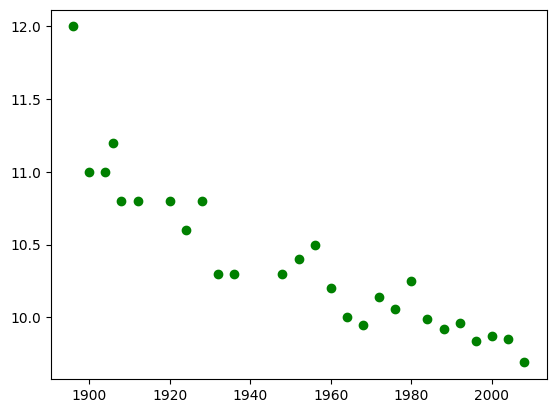

In [14]:
# Basic plotting
fig, ax = plt.subplots()
ax.scatter(male100['Year'], male100['Time'], color='g', label='Mens 100m')

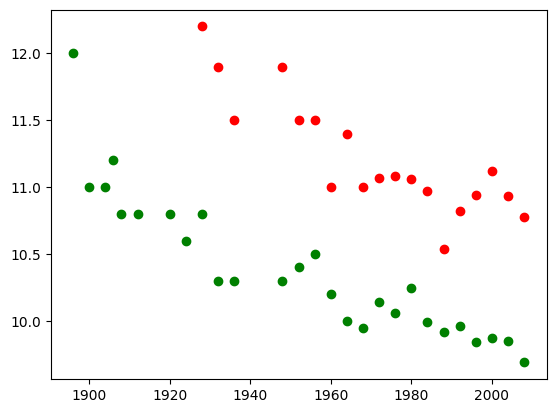

In [15]:
#Two different datasets in one graph
fig, ax = plt.subplots()
ax.scatter(male100['Year'], male100['Time'], color='g', label='Mens 100m')
ax.scatter(female100['Year'], female100['Time'], color='r', label='Womens 100m')

We can use matplotlib.plt to plot a simple linear function, for certain usage.

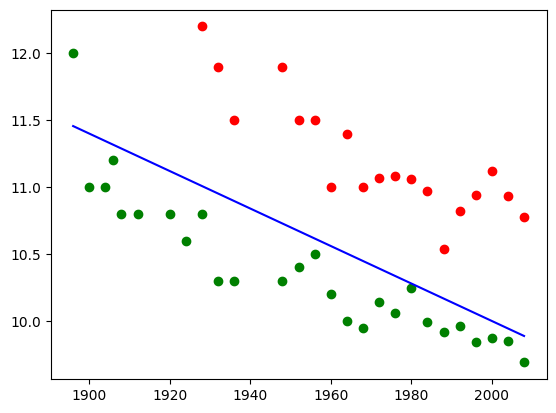

In [16]:
# We can use matplotlib.plt to plot a simple linear function
# First, define a linear function with respect to the all Olympic Years in male100.csv
y = -0.014*male100['Year'] + 38

# The plotting process
fig, ax = plt.subplots()
ax.plot(male100['Year'], y, color = 'b')
ax.scatter(male100['Year'], male100['Time'], color='g', label='Mens 100m')
ax.scatter(female100['Year'], female100['Time'], color='r', label='Womens 100m')

The above code uses the function *matplotlib.pyplot.plot()* and *matplotlib.pyplot.scatter()* <br>
Visit https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html and https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html for more details. <br>

## <font color='red'>Exercise 3.1 (15 marks)</font>

Define a linear function that separates *male100* data and *female100* data with 0 error. Plot the data and the linear function to demonstrate your result. <br>
Namely, in the figure above, the blue line should completely divide green points from red points. <br> 


**Hint**: For 0 error, we mean that in the figure above, the blue line should completely divide green points from red points. More specifically, all green points should lie below the plotted line and all red points should lie above the plotted line. In this exercise, a linear regression model is NOT necessary.

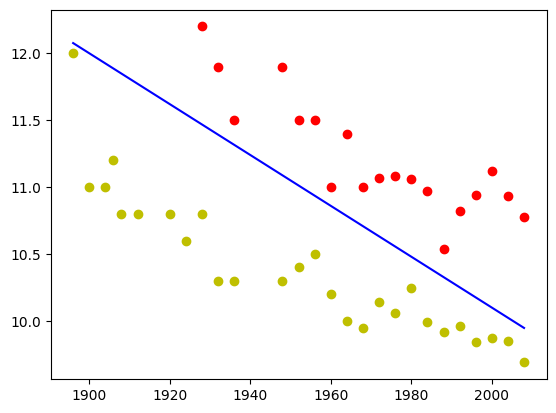

In [28]:
# For Exercise 3.1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

male100 = pd.read_csv('./olympic_data/male100.csv', header=0)
female100 = pd.read_csv('./olympic_data/female100.csv', header=0)
fig, ax = plt.subplots()
y = -0.019*male100['Year'] + 48.1
ax.plot(male100['Year'], y, color = 'b')
ax.scatter(male100['Year'], male100['Time'], color='y', label='Mens 100m')
ax.scatter(female100['Year'], female100['Time'], color='r', label='Womens 100m')

## <font color='red'>Exercise 3.2 (20 marks)</font>

Now consider another type of scenario: probability distributions. <br>
Given the bivariate normal distribution with the following probability density function $P(x_{1},x_{2})$: <br>

$\Large P(x_{1},x_{2})=\frac{1}{2\pi\sigma_{1}\sigma_{2}\sqrt{1-\rho^{2}}}\exp[-\frac{z}{2(1-\rho)^{2}}]$, <br>
$\Large z=\frac{(x_{1}-\mu_{1})^{2}}{\sigma_{1}^{2}}-\frac{2\rho(x_{1}-\mu_{1})(x_{2}-\mu_{2})}{\sigma_{1}\sigma_{2}}+\frac{(x_{2}-\mu_{2})^{2}}{\sigma_{2}^{2}}$, <br>
$\Large \rho=\frac{\sigma_{12}}{\sigma_{1}\sigma_{2}}$, <br>
where $\begin{bmatrix} \mu_{1}\\ \mu_{2} \end{bmatrix}$ is the mean vector of the normal distribution, and $\begin{bmatrix} \sigma_{1}^{2} & \sigma_{12}\\ \sigma_{12} & \sigma_{2}^{2} \end{bmatrix}$ denotes the covariance matrix of the normal distribution. <br>

Your task: <br>
Given $x_{1}\in[-3.0,3.0]$, $x_{2}\in[-3.0,3.0]$, sample enough 2D data points $(x_{1}, x_{2})$. <br>
Under the case that $\begin{bmatrix} \mu_{1}\\ \mu_{2} \end{bmatrix} = \begin{bmatrix} 0.0\\ 0.0 \end{bmatrix}$, $\begin{bmatrix} \sigma_{1}\\ \sigma_{2} \\ \sigma_{12} \end{bmatrix} = \begin{bmatrix} 3.0\\ 1.0\\ 0.0 \end{bmatrix}$, compute probability density values $P(x_{1},x_{2})$ for all sampled data points. <br>
Use *matplotlib.pyplot.imshow* with the default setting to plot the distribution, demonstrated by these probability density values $P(x_{1},x_{2})$. <br>

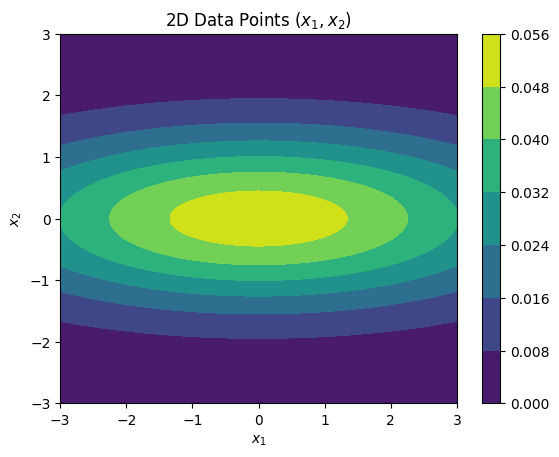

In [29]:
# For Exercise 3.2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    p = 0
    z = x1**2/9 + x2**2
    P = 1/((2*np.pi)*3*(1-p**2)**0.5) * np.exp(-z/(2*(1-p)**2))
    return P

x1_range = np.linspace(-3.0, 3.0, 100)
x2_range = np.linspace(-3.0, 3.0, 100)

x1, x2 = np.meshgrid(x1_range, x2_range)
z = f(x1, x2)

fig, ax = plt.subplots()
contour = ax.contourf(x1, x2, z, cmap='viridis')
fig.colorbar(contour)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title('2D Data Points $(x_{1}, x_{2})$')
plt.show()

# 4. Understand Numpy Arrays - Image Data

In this section, we show how to read and display a color image in RGB (Red-Green-Blue) format. To this end, we need to load matplotlib library. We also need to import the OpenCV-Python library for easy conversion and image manipulation.

In [19]:
import matplotlib.pyplot as plt
import cv2 as cv # Import OpenCV

The code below reads the Lena image and displays some basic information about it. <br>
**Hint**: Red, green, blue color form all colors in this world, for a RGB color image, it will have the size: rows x columns x channels (3 channels, R, G, B) <br>

In [20]:
# Loads an RGB image
# Use the correct path to the file if you are working on your machine 
image = plt.imread('./lena.jpg') # lena.jpg is the file name

# print type and size of the image (pixels and number of color channels)
print('image type:', image.dtype)
print('image shape:', image.shape)

image type: uint8
image shape: (256, 256, 3)


Probably you have already noticed that *matplotlib.pyplot* can help read image data, and the output is a numpy array. <br>
Next, we will perform example operations on the image.

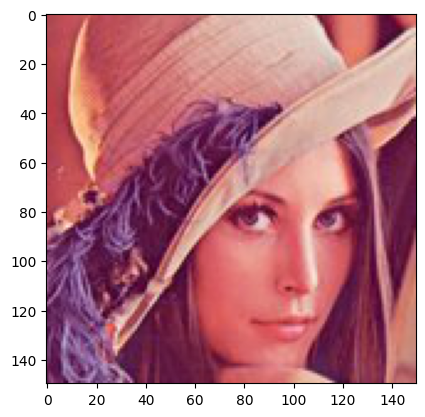

In [21]:
# Displays only a section of the the color image (from row 50 to 200 and from column 50 to 200) 
# Using imshow in matplotlib.pyplot library
plt.imshow(image[50:200, 50:200, :], )
plt.show()

****************************** Lena image ******************************
[[[177  69  82]
  [177  71  81]
  [178  73  80]
  ...
  [226 119 103]
  [227 117 100]
  [223 112  95]]

 [[177  69  82]
  [176  70  80]
  [176  72  79]
  ...
  [225 117 104]
  [226 119 103]
  [224 114  99]]

 [[175  69  81]
  [174  70  79]
  [175  71  78]
  ...
  [226 113 105]
  [229 117 106]
  [226 114 102]]

 ...

 [[ 95  33  80]
  [136  70 118]
  [129  59 111]
  ...
  [179  94  99]
  [176  91  96]
  [173  88  93]]

 [[ 92  33  79]
  [132  66 114]
  [144  74 126]
  ...
  [184 102 106]
  [180  98 102]
  [180  98 102]]

 [[ 87  28  74]
  [119  56 103]
  [149  79 129]
  ...
  [187 107 108]
  [185 105 108]
  [187 107 110]]]


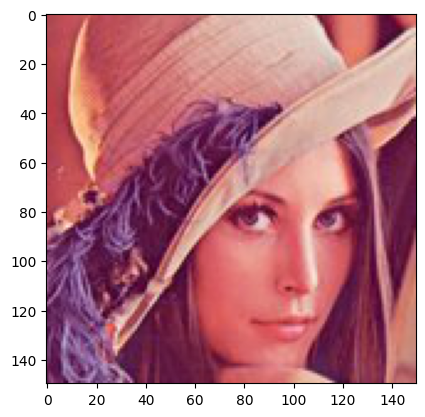

In [22]:
# Prints on the screen the pixel values of each channel and displays the color image (from row 50 to 200 and from column 50 to 200)
print('*' * 30, 'Lena image', '*' * 30)
print(image[50:200, 50:200, :])
plt.imshow(image[50:200, 50:200, :])
plt.show()

****************************** Red channel ******************************
[[177 177 178 ... 226 227 223]
 [177 176 176 ... 225 226 224]
 [175 174 175 ... 226 229 226]
 ...
 [ 95 136 129 ... 179 176 173]
 [ 92 132 144 ... 184 180 180]
 [ 87 119 149 ... 187 185 187]]


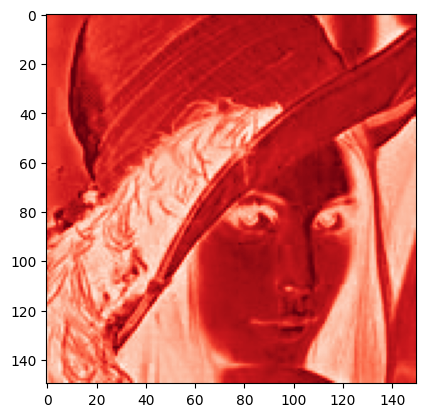

In [23]:
# Displays the Red channel and prints on the screen its pixel values (from row 50 to 200 and from column 50 to 200)
print('*' * 30, 'Red channel', '*' * 30)
img_R = image[50:200, 50:200, 0]
print(img_R)

# Use a red color map to display the Red channel
plt.imshow(img_R, cmap='Reds')
plt.show()

****************************** Green channel ******************************
[[ 69  71  73 ... 119 117 112]
 [ 69  70  72 ... 117 119 114]
 [ 69  70  71 ... 113 117 114]
 ...
 [ 33  70  59 ...  94  91  88]
 [ 33  66  74 ... 102  98  98]
 [ 28  56  79 ... 107 105 107]]


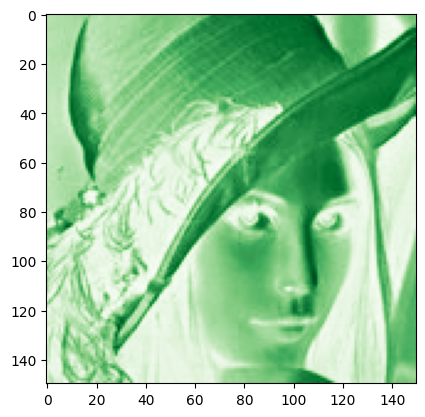

In [24]:
# Displays the Green channel and prints on the screen its pixel values (from row 50 to 200 and from column 50 to 200)
print('*' * 30 , 'Green channel', '*' * 30)
img_G = image[50:200, 50:200, 1]
print(img_G)

# Use a green color map to display the Green channel
plt.imshow(img_G, cmap='Greens')
plt.show()

****************************** Blue channel ******************************
[[ 82  81  80 ... 103 100  95]
 [ 82  80  79 ... 104 103  99]
 [ 81  79  78 ... 105 106 102]
 ...
 [ 80 118 111 ...  99  96  93]
 [ 79 114 126 ... 106 102 102]
 [ 74 103 129 ... 108 108 110]]


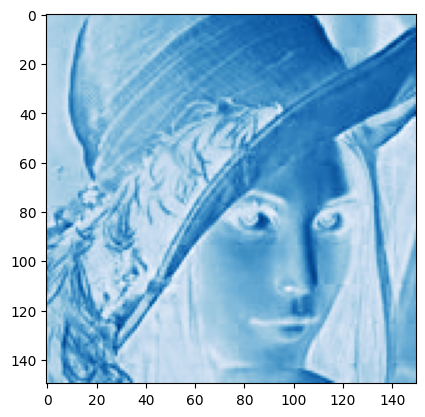

In [25]:
# Displays the Blue channel and prints on the screen its pixel values (from row 50 to 200 and from column 50 to 200)
print('*' * 30, 'Blue channel', '*' * 30)
img_B = image[50:200, 50:200, 2]
print(img_B)

# Use a blue color map to display the Blue channel
plt.imshow(img_B, cmap='Blues')
plt.show()

It is important to note that the Matplotlib library reads an image in RGB format. However, the OpenCV library reads an image as BGR (Blue, Green, Red). So, if you read an image with Matplotlib library (plt) and you want to use it with OpenCV functions, you need to convert the image from RGB to BGR. The conversion is shown below:

In [26]:
img_BGR = cv.cvtColor(image, cv.COLOR_RGB2BGR)

To convert an image from the BGR color space to the YUV color space, you may use *cv.cvtColor* with a flag *cv.COLOR_BGR2YUV*. <br>
A list of color space conversions is available at: https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html

## <font color='red'>Exercise 4.1 (10 marks)</font>

Convert the Lena image from the BGR color space to gray scale. Display the complete gray scale image using a gray color map.

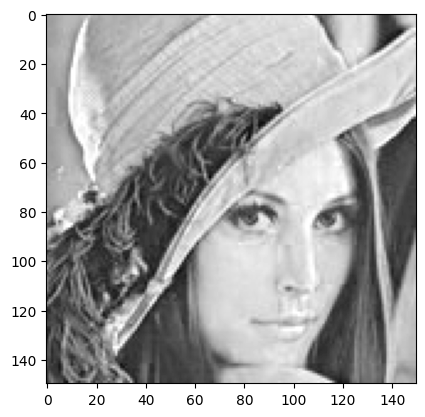

In [4]:
# For Exercise 4.1
import matplotlib.pyplot as plt
import cv2 as cv # Import OpenCV
image = plt.imread('./lena.jpg') # lena.jpg is the file name
img_G = image[50:200, 50:200, 0]
plt.imshow(img_G, cmap='gray')
plt.show()

## <font color='red'>Exercise 4.2 (10 marks)</font>

Convert the Lena image from the BGR color space to the YUV color space. Display the complete Y channel using a gray color map.

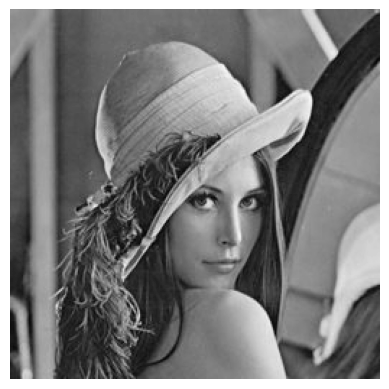

In [6]:
# For Exercise 4.2
import matplotlib.pyplot as plt
import cv2 as cv # Import OpenCV
image = plt.imread('./lena.jpg') # lena.jpg is the file name
# 将图像从 BGR 色彩空间转换为 YUV 色彩空间
lena_yuv = cv.cvtColor(image, cv.RGBTOGREY)

# 提取 Y 通道
y_channel = lena_yuv[:, :, 0]

# 使用灰度颜色映射显示 Y 通道
plt.imshow(y_channel, cmap='gray')
plt.axis('off')
plt.show()

An image is just a 2d matrix (or a 3d cube for color images) of pixel values that can be reshaped to any dimension. <br>
For example, to change the shape of an image, we can use the function *reshape()*. <br>
To flatten an image, we can use the function *flatten()* or the function *ravel()*. <br>
The code below flattens an image into a column vector of dimensions: ((image_height x image_width x no_of_channels), ).

In [29]:
image = plt.imread('./lena.jpg') # load lena.jpg 
print('Image dimensions:', image.shape)
reshaped_img1 = image.ravel() 
print('Vector dimensions after flattening:', reshaped_img1.shape)

Image dimensions: (256, 256, 3)
Vector dimensions after flattening: (196608,)


The *reshape()* function can be used to flatten an image. <br> 
Below is an example of flatten into a row vector. <br>
The argument -1 compute the number automatically for denoted data dimension.

In [30]:
print('Image Dimensions:', image.shape)
reshaped_img2 = image.reshape(1, -1)
reshaped_img3 = image.reshape(1, image.shape[0] * image.shape[1] * image.shape[2])
print('Vector dimensions after reshaping (using -1):', reshaped_img2.shape)
print('Vector dimensions after reshaping (using actual dimensions):', reshaped_img3.shape)

Image Dimensions: (256, 256, 3)
Vector dimensions after reshaping (using -1): (1, 196608)
Vector dimensions after reshaping (using actual dimensions): (1, 196608)


## <font color='red'>Exercise 4.3 (10 marks)</font>

Use function *reshape()* to change the row vector above (reshaped_img2) to a column vector. Print its dimensions before reshaping and after reshaping.

In [8]:
# For Exercise 4.3
import matplotlib.pyplot as plt
import cv2 as cv
image = plt.imread('./lena.jpg')
reshaped_img2 = image.reshape(1, -1)
reshaped_img3 = reshaped_img2.reshape(-1, 1)
print(reshaped_img2.shape)
print(reshaped_img3.shape)


(1, 196608)
(196608, 1)


## <font color='red'>Exercise 4.4 (10 marks)</font>

Use function *reshape()* to reshape the row vector above (reshaped_img2) back to the original image size. Print its dimensions before reshaping and after reshaping and display the complete image.

In [13]:
# For Exercise 4.4
# For Exercise 4.3
import matplotlib.pyplot as plt
import cv2 as cv
image = plt.imread('./lena.jpg')
reshaped_img2 = image.reshape(1, -1)
reshaped_img3 = reshaped_img2.reshape(256, 256, 3)
print(reshaped_img2.shape)
print(reshaped_img3.shape)

(1, 196608)
(256, 256, 3)


## <font color='blue'>Submission</font>

You only need to submit the jupyter file in **ipynb** format, rename it as: A1_YOURID_YOURNAME (For instance: A1_2023141520000_Sofia) <br>